# Python project by Ruthy Astafyeva

The main aim of the project is to creat a convenient database with the texts of Russian classical literature and using the texts to create exercises for class tests. The convenience of such a database is that one can easily and quickly add texts to it, updating the exercise material.

In [70]:
#! pip install pymystem3

from pymystem3 import Mystem
import pandas as pd
import csv
import sqlite3
import requests

In [13]:
df_url = pd.read_csv('python_project.csv') #downloading csv-files
df_rating = pd.read_csv('rating.csv')

In [58]:
con.close()
con = sqlite3.connect("lit_tests.db") #creating database
cur = con.cursor()

In [59]:
df_url.to_sql(name='data', con=con, if_exists='replace') #The table contains texts' urls.
df_rating.to_sql(name='rating', con=con, if_exists='replace') #The table contains rating information.

/srv/conda/envs/notebook/lib/python3.6/site-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [62]:
cur.execute('SELECT name, average FROM rating')
averages = pd.DataFrame(cur.fetchall())

The barplot demonstrates average ratings. According to the data, the most interesting texts from the list for students are "Мастер и Маргарита", "Война и мир", "Преступление и наказание", "Отцы и дети".  The least interesting are Tyutchev's and Fet's lirics and "Гроза". 

<AxesSubplot:title={'center':'Average Ratings'}, ylabel='0'>

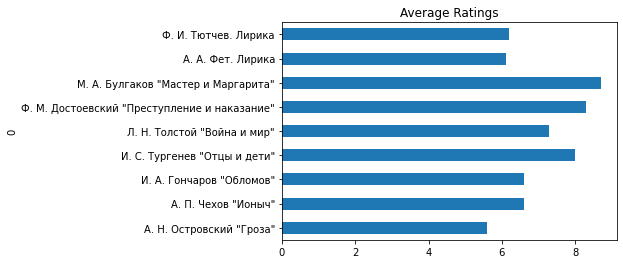

In [68]:
averages.set_index([0])[1].plot(kind='barh', title='Average Ratings')

### The first text will be 'Master and Margarita' by M. A. Bulgakov.

In [69]:
cur.execute('SELECT name, text FROM data WHERE id = 1')
script = cur.fetchall()
print(script)
url = script[0][1]

[('Мастер и Маргарита', 'https://raw.githubusercontent.com/astafyevai/python_final.project/main/masterimargarita.txt')]


In [9]:
response = requests.get(url)
text = response.text

In [11]:
text[:1000] #checking the coding

'Мастер и Маргарита\nМихаил Афанасиевич Булгаков\n\nРусская классика\n\n  \xa0 Прекрасно оформленное подарочное издание в шелковом переплете с трехсторонним окрашенным обрезом. Обложка книги украшена аппликацией. В книге представлено бессмертное творение русской литературы XX века. Легендарная фантасмагория "Мастер и Маргарита"... Произведения Михаила Булгакова - многоплановые, неоднозначные, раскрывающие разные грани его яркого таланта! Глубоко философский роман М.Булгакова иллюстрациями П.Оринянского не исчерпан, но и не умален. Иллюстрации обогатили книгу прекрасными портретами-образами, сделали интересней и для чтения, и для зрительского восприятия и, пожалуй, самое главное, - открыли новое духовное пространство. Художник вслед за Булгаковым ищет путь не к логике, а к интуиции читателя, что-то нашептывает ему, подсказывает, намекает, помогает ему ощутить сладость самостоятельных читательских открытий. Силовые линии иллюстраций П.Оринянского обращены не внутрь листа, а рвутся наружу

In [12]:
m = Mystem()

In [13]:
lemmas = m.lemmatize(text)
lemmas[10:20]

['булгаков',
 '\n',
 '\n',
 'русский',
 ' ',
 'классика',
 '\n',
 '\n',
 '  \xa0 ',
 'прекрасно']

In [60]:
p = ([x for x in lemmas if x.isalpha()]) #p contains words only

In [61]:
len(p) #words amount

112106

In [62]:
pd.Series(p).nunique() #number of unic words

10418

In [63]:
pd.Series(p).value_counts().head(50) #top 50 words in terms of frequency

и              5025
в              3651
он             2167
не             2031
на             2005
что            1876
я              1391
быть           1388
с              1306
а               977
она             886
как             841
это             800
то              784
вы              761
этот            760
но              714
к               701
маргарита       624
же              595
у               528
из              528
по              478
сказать         470
за              469
ты              426
тот             423
так             411
свой            411
от              382
один            374
рука            368
все             366
они             361
который         355
весь            355
иван            354
человек         349
глаз            346
отвечать        341
о               327
тут             306
да              306
себя            302
бы              300
его             298
становиться     285
только          281
уже             278
нет             274


In [72]:
ana = m.analyze(','.join(list(set(p))))

The aim of this part of the code is to make an exercise for students. The task is to guess the book from the most frequent words. To make it easier for students, I decided to consider only nouns.

In [81]:
words_include = []
for word in ana:
    if ('analysis' in word) and word['analysis']:
        gr = word['analysis'][0]['gr']
        pos = gr.split('=')[0].split(',')[0]
        if pos == 'S' and 'имя' not in gr and 'фам' not in gr and 'отч' not in gr and 'сокр' not in gr:
            words_include.append(word['text'])

To understand which words I must delete I decided to found them and to check their structure. Here is an example for 'Воланд' which firstly was in the list of the top words. 

In [87]:
#i = 0
#for w in ana:
#    i += 1
#    if w['text'] == 'воланд':
#        print(i)

14255


In [88]:
# ana[14254]

{'analysis': [{'lex': 'воланд',
   'wt': 0.7324094467,
   'gr': 'S,фам,муж,од=им,ед'}],
 'text': 'воланд'}

In [82]:
p_new = [x for x in p if x in words_include] #p_new has only nouns from the text

In [83]:
pd.Series(p_new).value_counts().head(15) #top-15 nouns from the text

рука          368
человек       349
глаз          346
прокуратор    267
мочь          249
голова        246
кот           233
лицо          230
время         214
голос         184
дело          167
мастер        167
слово         159
гость         155
квартира      152
dtype: int64

One more exercise is to find extra (not from the current novel) character on the list. In preparation for this exercise, I decided to display the most popular (frequent) first and last names found in the text. Next, one needs to act individually for each book, depending on the complexity: add minor characters (or even not characters, but any names), if the task turned out to be obvious, or add bright characters from other books, if many minor characters from the book were included in the list of names

In [84]:
names_include = []
for word in ana:
    if ('analysis' in word) and word['analysis']:
        gr = word['analysis'][0]['gr']
        pos = gr.split('=')[0].split(',')[0]
        if pos == 'S' and ('имя' in gr or 'фам' in gr):
            names_include.append(word['text'])

In [85]:
names = [x for x in p if x in names_include]

In [86]:
pd.Series(names).value_counts().head(15)

маргарита    624
иван         354
воланд       266
коровьев     227
пилат        196
азазелло     152
берлиоз      147
никанор      134
варенуха     103
степа        101
левий         75
иешуа         58
наташа        53
аннушка       52
бездомный     46
dtype: int64

### Here is data for "Thunderstorm" ("Groza") A. N. Ostrovsky.

In [26]:
cur.execute('SELECT name, text FROM data WHERE id = 2')
script = cur.fetchall()
print(script)
url = script[0][1]

[('Гроза', 'https://raw.githubusercontent.com/astafyevai/python_final.project/main/groza.txt')]


In [89]:
response = requests.get(url)
text = response.text
m = Mystem()
lemmas = m.lemmatize(text)
p = ([x for x in lemmas if x.isalpha()])
ana = m.analyze(','.join(list(set(p))))
words_include = []
for word in ana:
    if ('analysis' in word) and word['analysis']:
        gr = word['analysis'][0]['gr']
        pos = gr.split('=')[0].split(',')[0]
        if pos == 'S' and 'имя' not in gr and 'фам' not in gr and 'отч' not in gr and 'сокр' not in gr:
            words_include.append(word['text'])
p_new = [x for x in p if x in words_include]
pd.Series(p_new).value_counts().head(15)

кудряш      84
явление     82
сударь      59
маменька    50
человек     49
мочь        40
дело        37
грех        34
бог         34
глаз        28
дом         27
народ       25
муж         24
рука        24
сердце      24
dtype: int64

In [91]:
names_include = []
for word in ana:
    if ('analysis' in word) and word['analysis']:
        gr = word['analysis'][0]['gr']
        pos = gr.split('=')[0].split(',')[0]
        if pos == 'S' and ('имя' in gr or 'фам' in gr):
            names_include.append(word['text'])
names = [x for x in p if x in names_include]
pd.Series(names).value_counts().head(15)

катерина    183
борис       149
варвара     142
кабанов     122
кабанова    108
кулигин      95
глаша        36
феклуша      27
катя         20
шапкин       15
тихон        10
савел        10
тиша          8
марфа         7
варя          7
dtype: int64

### Here is data for "Ionych" A. P. Chekhov.

In [27]:
cur.execute('SELECT name, text FROM data WHERE id = 3')
script = cur.fetchall()
print(script)
url = script[0][1]

[('Ионыч', 'https://raw.githubusercontent.com/astafyevai/python_final.project/main/ionych.txt')]


In [28]:
response = requests.get(url)
text = response.text
m = Mystem()
lemmas = m.lemmatize(text)
p = ([x for x in lemmas if x.isalpha()])
ana = m.analyze(','.join(list(set(p))))
words_include = []
for word in ana:
    if ('analysis' in word) and word['analysis']:
        gr = word['analysis'][0]['gr']
        pos = gr.split('=')[0].split(',')[0]
        if pos == 'S' and 'имя' not in gr and 'фам' not in gr and 'отч' not in gr and 'сокр' not in gr:
            words_include.append(word['text'])
p_new = [x for x in p if x in words_include]
pd.Series(p_new).value_counts().head(15)

Installing mystem to /home/jovyan/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


старец     34
город      20
жизнь      18
вера       17
дом        17
мочь       15
котик      14
человек    14
день       13
клуб       13
гость      13
рука       12
время      12
сад        12
вечер      12
dtype: int64

In [29]:
names_include = []
for word in ana:
    if ('analysis' in word) and word['analysis']:
        gr = word['analysis'][0]['gr']
        pos = gr.split('=')[0].split(',')[0]
        if pos == 'S' and ('имя' in gr):
            names_include.append(word['text'])
names = [x for x in p if x in names_include]
pd.Series(names).value_counts().head(15)

екатерина      26
иван           22
дмитрий         8
пантелеймон     7
алексей         2
павлуша         1
денис           1
верочка         1
ия              1
отелло          1
dtype: int64

### Here is data for Fet's poetry.

For exercise with names I took only first names: Fet's last name was at the first place.

In [32]:
cur.execute('SELECT name, text FROM data WHERE id = 8')
script = cur.fetchall()
print(script)
url = script[0][1]

[('Лирика', 'https://raw.githubusercontent.com/astafyevai/python_final.project/main/fet.txt')]


In [102]:
response = requests.get(url)
text = response.text
m = Mystem()
lemmas = m.lemmatize(text)
p = ([x for x in lemmas if x.isalpha()])
ana = m.analyze(','.join(list(set(p))))
words_include = []
for word in ana:
    if ('analysis' in word) and word['analysis']:
        gr = word['analysis'][0]['gr']
        pos = gr.split('=')[0].split(',')[0]
        if pos == 'S' and 'имя' not in gr and 'фам' not in gr and 'отч' not in gr and 'сокр' not in gr:
            words_include.append(word['text'])
p_new = [x for x in p if x in words_include]
pd.Series(p_new).value_counts().head(15)

жизнь     97
душа      80
ночь      76
сердце    73
друг      64
день      61
небо      49
звезда    49
мир       48
огонь     46
рука      44
мочь      44
звук      41
сон       41
слово     40
dtype: int64

In [105]:
names_include = []
for word in ana:
    if ('analysis' in word) and word['analysis']:
        gr = word['analysis'][0]['gr']
        pos = gr.split('=')[0].split(',')[0]
        if pos == 'S' and ('имя' in gr):
            names_include.append(word['text'])
names = [x for x in p if x in names_include]
pd.Series(names).value_counts().head(15)

мария       12
афанасий     8
диана        7
офелия       5
сергей       4
зараня       4
аполлон      4
венера       3
эндимион     3
татьяна      3
дарья        3
долли        3
калиф        2
серафим      2
телемак      2
dtype: int64

### Here is data for Tyutchev's poetry. 

As in the case with Fet I did not considered last names. From my point of view, It is imposible for these collections of poems (both Tyutchev and Fet) be part of the literature test, but it is interesting to discuss on class the words related to authors' biography and the main themes in poems.

In [33]:
cur.execute('SELECT name, text FROM data WHERE id = 9')
script = cur.fetchall()
print(script)
url = script[0][1]

[('Лирика', 'https://raw.githubusercontent.com/astafyevai/python_final.project/main/tutchev.txtt')]


In [106]:
response = requests.get(url)
text = response.text
m = Mystem()
lemmas = m.lemmatize(text)
p = ([x for x in lemmas if x.isalpha()])
ana = m.analyze(','.join(list(set(p))))
words_include = []
for word in ana:
    if ('analysis' in word) and word['analysis']:
        gr = word['analysis'][0]['gr']
        pos = gr.split('=')[0].split(',')[0]
        if pos == 'S' and 'имя' not in gr and 'фам' not in gr and 'отч' not in gr and 'сокр' not in gr:
            words_include.append(word['text'])
p_new = [x for x in p if x in words_include]
pd.Series(p_new).value_counts().head(15)

день      151
душа      135
небо      119
мир       116
жизнь     114
земля      88
сердце     82
любовь     80
бог        76
друг       75
тень       74
сон        73
свет       69
ночь       65
луч        62
dtype: int64

In [107]:
names_include = []
for word in ana:
    if ('analysis' in word) and word['analysis']:
        gr = word['analysis'][0]['gr']
        pos = gr.split('=')[0].split(',')[0]
        if pos == 'S' and ('имя' in gr):
            names_include.append(word['text'])
names = [x for x in p if x in names_include]
pd.Series(names).value_counts().head(15)

гектор          8
урания          7
ниса            6
персей          4
наполеон        4
микеланджело    4
андрей          3
петр            3
рая             3
ной             3
ипполит         3
серафима        3
гюго            2
злата           2
беранже         2
dtype: int64

### Here is data for "Oblomov" I. A. Goncharov.

In [35]:
cur.execute('SELECT name, text FROM data WHERE id = 4')
script = cur.fetchall()
print(script)
url = script[0][1]

[('Обломов', 'https://raw.githubusercontent.com/astafyevai/python_final.project/main/oblomov.txtt')]


In [108]:
response = requests.get(url)
text = response.text
m = Mystem()
lemmas = m.lemmatize(text)
p = ([x for x in lemmas if x.isalpha()])
ana = m.analyze(','.join(list(set(p))))
words_include = []
for word in ana:
    if ('analysis' in word) and word['analysis']:
        gr = word['analysis'][0]['gr']
        pos = gr.split('=')[0].split(',')[0]
        if pos == 'S' and 'имя' not in gr and 'фам' not in gr and 'отч' not in gr and 'сокр' not in gr:
            words_include.append(word['text'])
p_new = [x for x in p if x in words_include]
pd.Series(p_new).value_counts().head(15)

жизнь      450
мочь       373
глаз       373
рука       367
дело       305
голова     287
день       279
лицо       269
человек    260
дом        222
взгляд     197
год        190
любовь     177
сердце     174
письмо     172
dtype: int64

In [110]:
names_include = []
for word in ana:
    if ('analysis' in word) and word['analysis']:
        gr = word['analysis'][0]['gr']
        pos = gr.split('=')[0].split(',')[0]
        if pos == 'S' and ('имя' in gr or 'фам' in gr):
            names_include.append(word['text'])
names = [x for x in p if x in names_include]
pd.Series(names).value_counts().head(15)

обломов      1192
захар         599
ольга         453
илья          392
штольц        265
тарантьев     182
андрей        151
анисья        119
иван           97
агафья         67
алексеев       65
михей          33
катя           33
андрюша        29
сонечка        24
dtype: int64

### Here is data for 'Fathers and sons' ("Otcy i deti") by I. S. Turgenev.

In [36]:
cur.execute('SELECT name, text FROM data WHERE id = 5')
script = cur.fetchall()
print(script)
url = script[0][1]

[('Отцы и дети', 'https://raw.githubusercontent.com/astafyevai/python_final.project/main/otcydeti.txtt')]


In [111]:
response = requests.get(url)
text = response.text
m = Mystem()
lemmas = m.lemmatize(text)
p = ([x for x in lemmas if x.isalpha()])
ana = m.analyze(','.join(list(set(p))))
words_include = []
for word in ana:
    if ('analysis' in word) and word['analysis']:
        gr = word['analysis'][0]['gr']
        pos = gr.split('=')[0].split(',')[0]
        if pos == 'S' and 'имя' not in gr and 'фам' not in gr and 'отч' not in gr and 'сокр' not in gr:
            words_include.append(word['text'])
p_new = [x for x in p if x in words_include]
pd.Series(p_new).value_counts().head(15)

человек    200
рука       157
глаз       115
лицо       105
отец       103
голова     101
день        90
год         89
слово       88
время       88
брат        82
дело        74
сын         72
дом         56
комната     56
dtype: int64

In [112]:
names_include = []
for word in ana:
    if ('analysis' in word) and word['analysis']:
        gr = word['analysis'][0]['gr']
        pos = gr.split('=')[0].split(',')[0]
        if pos == 'S' and ('имя' in gr or 'фам' in gr):
            names_include.append(word['text'])
names = [x for x in p if x in names_include]
pd.Series(names).value_counts().head(15)

базаров     506
аркадий     390
павел       196
николай     183
анна        118
василий     113
катя         95
евгений      92
одинцов      78
фенечка      74
ситников     40
арина        37
петр         37
одинцова     25
митя         18
dtype: int64

### Here is data for 'Crime And Punishment' ("Prestuplenie i nakazanie") by F. M. Dostoevsky.

In [38]:
cur.execute('SELECT name, text FROM data WHERE id = 7')
script = cur.fetchall()
print(script)
url = script[0][1]

[('Преступление и наказание', 'https://raw.githubusercontent.com/astafyevai/python_final.project/main/prestuplenie.txtt')]


In [117]:
response = requests.get(url)
text = response.text
m = Mystem()
lemmas = m.lemmatize(text)
p = ([x for x in lemmas if x.isalpha()])
ana = m.analyze(','.join(list(set(p))))
words_include = []
for word in ana:
    if ('analysis' in word) and word['analysis']:
        gr = word['analysis'][0]['gr']
        pos = gr.split('=')[0].split(',')[0]
        if pos == 'S' and 'имя' not in gr and 'фам' not in gr and 'отч' not in gr and 'сокр' not in gr:
            words_include.append(word['text'])
p_new = [x for x in p if x in words_include]
pd.Series(p_new).value_counts().head(15)

мочь            751
раскольников    726
человек         502
рука            369
дело            363
раз             328
минута          278
время           262
слово           237
лицо            233
глаз            230
дверь           224
голова          211
комната         211
день            203
dtype: int64

#### The last name of the main character is here. Mystem recognized it as a form of the noun 'раскольник'.

In [114]:
#i = 0
#for w in ana:
#    i += 1
#    if w['text'] == 'раскольников':
#        print(i)

21261


In [115]:
#ana[21260]

{'analysis': [{'lex': 'раскольник',
   'wt': 0.1463848409,
   'gr': 'S,муж,од=(вин,мн|род,мн)'}],
 'text': 'раскольников'}

In [118]:
names_include = []
for word in ana:
    if ('analysis' in word) and word['analysis']:
        gr = word['analysis'][0]['gr']
        pos = gr.split('=')[0].split(',')[0]
        if pos == 'S' and ('имя' in gr or 'фам' in gr):
            names_include.append(word['text'])
names = [x for x in p if x in names_include]
pd.Series(names).value_counts().head(15)

соня            379
разумихин       350
катерина        223
дуня            209
свидригайлов    207
порфирий        206
петр            179
пульхерия       128
авдотья         118
лужин           114
дунечка         109
родя            106
родион          102
зосимов          90
марфа            83
dtype: int64

### Here is data for 'War and Peace' ("Voyna i mir") by L. N. Tolstoy (only the first book).

In [39]:
cur.execute('SELECT name, text FROM data WHERE id = 6')
script = cur.fetchall()
print(script)
url = script[0][1]

[('Война и мир', 'https://raw.githubusercontent.com/astafyevai/python_final.project/main/voynamir.txtt')]


In [14]:
response = requests.get(url)
text = response.text
m = Mystem()
lemmas = m.lemmatize(text)
p = ([x for x in lemmas if x.isalpha()])
ana = m.analyze(','.join(list(set(p))))
words_include = []
for word in ana:
    if ('analysis' in word) and word['analysis']:
        gr = word['analysis'][0]['gr']
        pos = gr.split('=')[0].split(',')[0]
        if pos == 'S' and 'имя' not in gr and 'фам' not in gr and 'отч' not in gr and 'сокр' not in gr:
            words_include.append(word['text'])
p_new = [x for x in p if x in words_include]
pd.Series(p_new).value_counts().head(15)

строка     1434
князь      1158
слово       696
изда        564
мочь        488
человек     469
лицо        464
рука        395
ростов      383
глаз        325
офицер      255
княжна      252
дело        251
время       249
солдат      239
dtype: int64

#### Mystem decised that 'ростов' is the geographical object.

In [15]:
i = 0
for w in ana:
    i += 1
    if w['text'] == 'ростов':
        print(i)

7877


In [16]:
ana[7876]

{'analysis': [{'lex': 'ростов',
   'wt': 0.167995725,
   'gr': 'S,гео,муж,неод=(вин,ед|им,ед)'}],
 'text': 'ростов'}

##### Exluding 'Ростов'  

In [17]:
for word in ana:
    if ('analysis' in word) and word['analysis']:
        gr = word['analysis'][0]['gr']
        pos = gr.split('=')[0].split(',')[0]
        if pos == 'S' and 'имя' not in gr and 'фам' not in gr and 'отч' not in gr and 'сокр' not in gr and 'geo' not in gr:
            words_include.append(word['text'])
p_new = [x for x in p if x in words_include]
pd.Series(p_new).value_counts().head(15)

строка     1434
князь      1158
слово       696
изда        564
мочь        488
человек     469
лицо        464
рука        395
ростов      383
глаз        325
офицер      255
княжна      252
дело        251
время       249
солдат      239
dtype: int64

In [120]:
names_include = []
for word in ana:
    if ('analysis' in word) and word['analysis']:
        gr = word['analysis'][0]['gr']
        pos = gr.split('=')[0].split(',')[0]
        if pos == 'S' and ('имя' in gr or 'фам' in gr):
            names_include.append(word['text'])
names = [x for x in p if x in names_include]
pd.Series(names).value_counts().head(15)

андрей        562
пьер          487
анна          311
кутузов       241
борис         226
василий       180
денисов       153
николай       139
багратион     138
марья         137
наташа        135
болконский    133
анатоль       120
долохов       120
бонапарт       94
dtype: int64

There are a lot more detailed notebooks in this same directory that cover other topics, but we can not cover all in a 3-hour tutorial. We encourage you to explore them and practice on your own.